In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 8)

### 1. Extracted DataSet

In [3]:
titanic_dataset = pd.read_csv('../Datasets/Titanic-Dataset.csv')
titanic_dataset.head(12)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
5       0            330877   8.4583   NaN        Q  
6       0             17463  51.8625   E46        S  
7       1            349909  21.0750   NaN        S  
8       2            347742  11.1333   NaN        S  
9       0            237736  30.0708   NaN        C  
10      1           PP 9549  16.7000    G6        S  
11      0            113783  26.5500  C103        S

In [30]:
titanic_dataset.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [66]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      889 non-null    object 
 11  Cabin_Status  891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [4]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
print('Cabins :\n',titanic_dataset['Cabin'].unique()[:10],'...')
print('People with NO Personal Cabins :',titanic_dataset['Cabin'].isna().sum())
print('People with Cabins :',titanic_dataset['Cabin'].notna().sum())

Cabins :
 [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'] ...
People with NO Personal Cabins : 687
People with Cabins : 204


In [42]:
titanic_dataset['Cabin_Status'] = titanic_dataset['Cabin'].notnull().astype(int)
titanic_dataset.drop('Cabin', axis=1, inplace=True)
titanic_dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Cabin_Status  
0      0         A/5 21171   7.2500        S             0  
1      0          PC 17599  71.2833        C             1  
2      0  STON/O2. 3101282   7.9250        S             0  
3      0            113803  53.1000        S             1  
4      0            373450   8.0500        S             0

Insight:
- Only 204 people had cabins and the rest of 687 people did not had any personal cabin.

In [43]:
titanic_dataset.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          2
Cabin_Status      0
dtype: int64

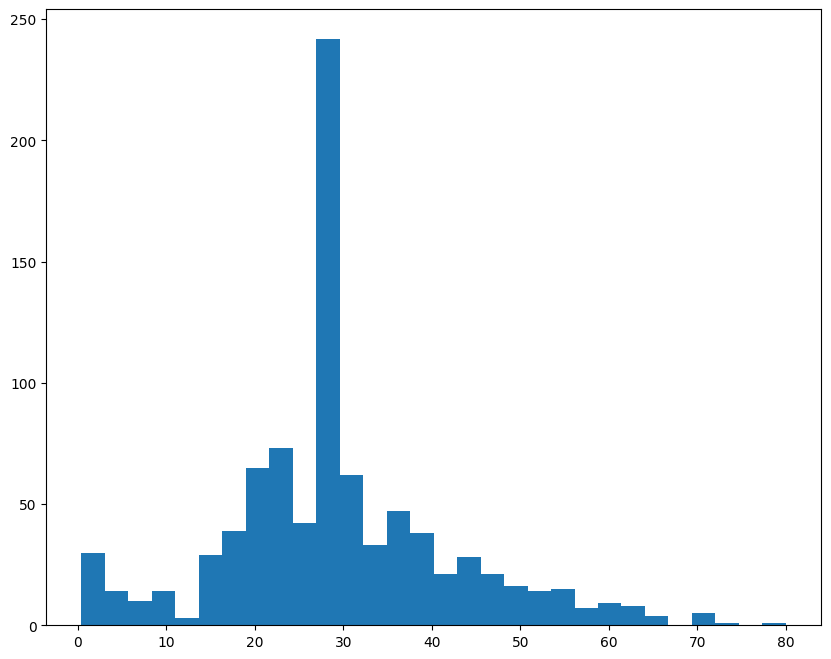

In [128]:
plt.hist(data=titanic_dataset,bins=30,x='Age')
plt.show()

In [58]:
titanic_dataset['Age'].replace({np.nan:titanic_dataset['Age'].median()}, inplace=True)
titanic_dataset['Age'].value_counts()

Age
28.00    202
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 88, dtype: int64

Insight:
- Majority population where in there late 20'es, followed by childres,from age group 1 to 10. Additionaly, we can also see a spike in people in there 70'es and the oldest being of 80 years old.

In [59]:
titanic_dataset.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        2
Cabin_Status    0
dtype: int64

In [70]:
titanic_dataset['Embarked'].replace({np.nan:titanic_dataset['Embarked'].mode()[0]}, inplace=True)
titanic_dataset['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [71]:
titanic_dataset.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Cabin_Status    0
dtype: int64

In [76]:
titanic_dataset.drop('PassengerId', axis=1, inplace=True)
titanic_dataset.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500        S   
1  female  38.0      1      0          PC 17599  71.2833        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S   
3  female  35.0      1      0            113803  53.1000        S   
4    male  35.0      0      0            373450   8.0500        S   

   Cabin_Status  
0             0  
1             1  
2             0  
3             1  
4             0

#### - Univariate Analysis

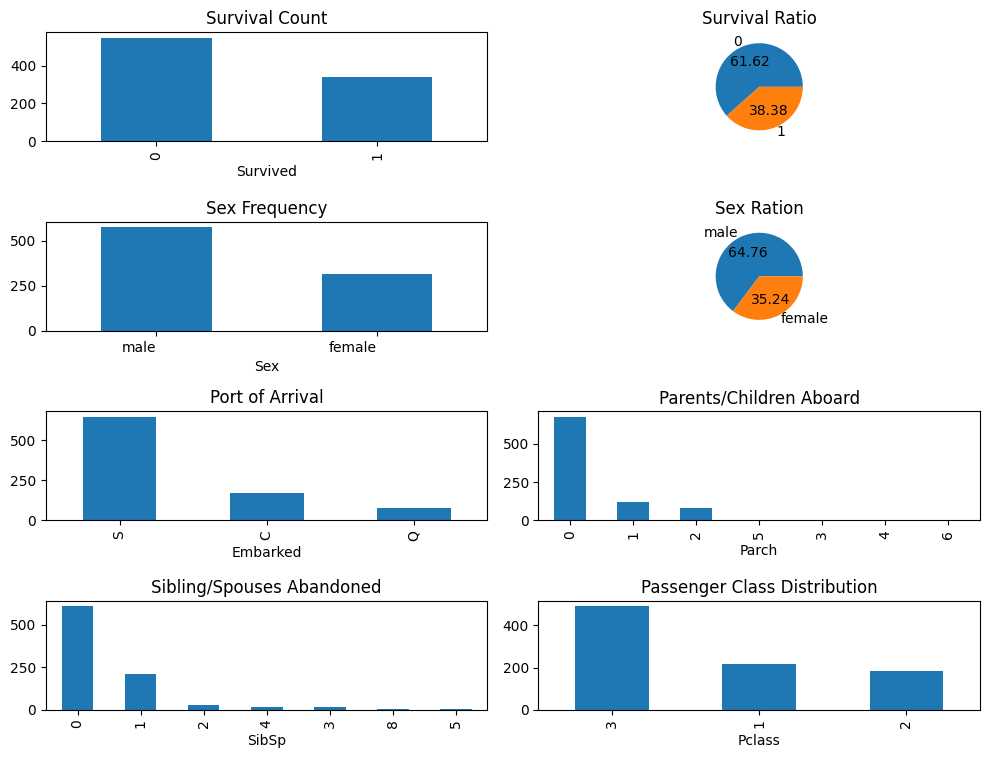

In [131]:
x,y = 4,2
plt.subplot(x,y,1)
titanic_dataset['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Count')

plt.subplot(x,y,2)
titanic_dataset['Survived'].value_counts().plot(kind='pie',autopct = "%.2f")
plt.title('Survival Ratio')
plt.ylabel("")
#-----

plt.subplot(x,y,3)
titanic_dataset['Sex'].value_counts().plot(kind='bar')
plt.title('Sex Frequency')
plt.xticks(rotation=0, ha='right')

plt.subplot(x,y,4)
titanic_dataset['Sex'].value_counts().plot(kind='pie',autopct = "%.2f")
plt.title('Sex Ration')
plt.ylabel("")
#----

plt.subplot(x,y,5)
titanic_dataset['Embarked'].value_counts().plot(kind='bar')
plt.title('Port of Arrival')

plt.subplot(x,y,6)
titanic_dataset['Parch'].value_counts().plot(kind='bar')
plt.title('Parents/Children Aboard')
#----

plt.subplot(x,y,7)
titanic_dataset['SibSp'].value_counts().plot(kind='bar')
plt.title('Sibling/Spouses Abandoned')

plt.subplot(x,y,8)
titanic_dataset['Pclass'].value_counts().plot(kind='bar')
plt.title('Passenger Class Distribution')

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

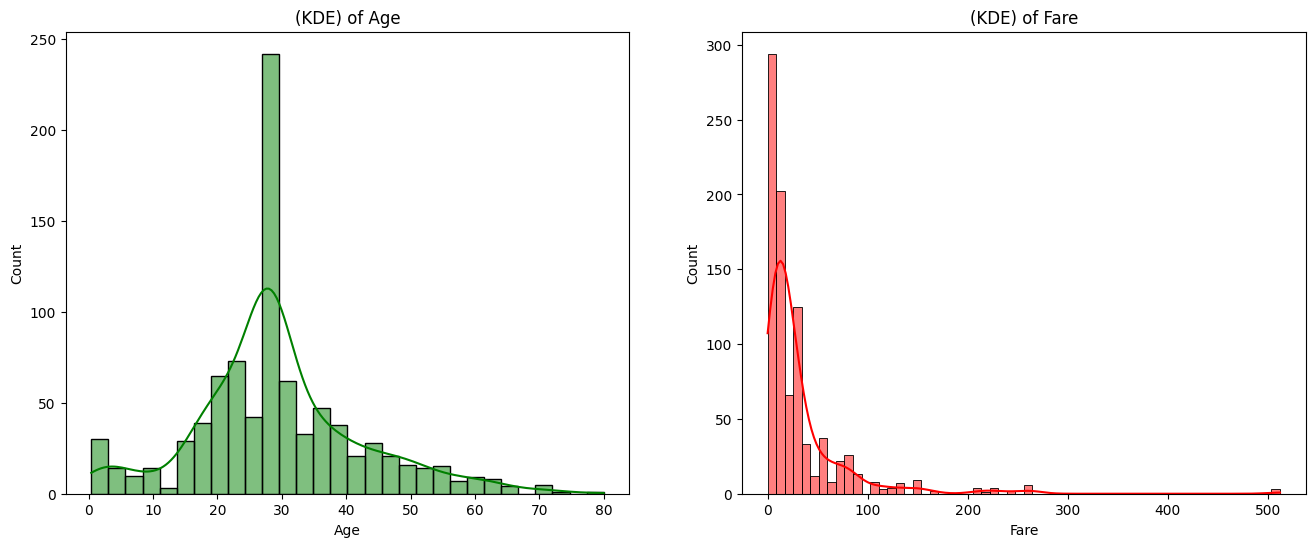

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(ax=axes[0], data= titanic_dataset['Age'], fill=True, color='green', kde=True).set_title('(KDE) of Age')
sns.histplot(ax=axes[1], data = titanic_dataset['Fare'], fill=True, color='red', kde=True).set_title('(KDE) of Fare')
plt.show()

In [51]:
print('Max: ',titanic_dataset['Fare'].max(), '\nMin: ', titanic_dataset['Fare'].min())

Max:  512.3292 
Min:  0.0


Insight
- Majority population where in there late 20'es, followed by childres,from age group 1 to 10. Additionaly, we can also see a spike in people in there 70'es and the oldest being of 80 years old.
- Fair was for majority where in the range 20-60 Pounds, least at 0 pounds and highest going above 500 pounds.

#### - Bi-Variate Analysis

In [141]:
titanic_dataset.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Cabin_Status'],
      dtype='object')

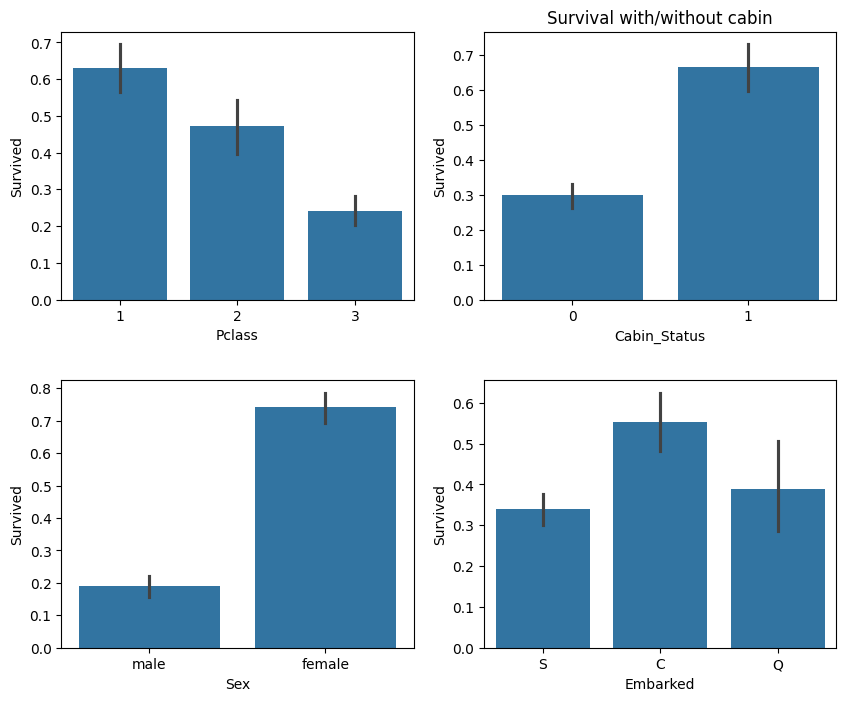

In [42]:
_,axes = plt.subplots(2,2)

sns.barplot(ax=axes[0,0], x='Pclass', y='Survived', data=titanic_dataset)
sns.barplot(ax=axes[0,1], x='Cabin_Status', y='Survived', data=titanic_dataset).set_title("Survival with/without cabin")
sns.barplot(ax=axes[1,0], x='Sex', y='Survived', data=titanic_dataset)
sns.barplot(ax=axes[1,1], x='Embarked', y='Survived', data=titanic_dataset)
plt.subplots_adjust(hspace=0.3)
plt.show()

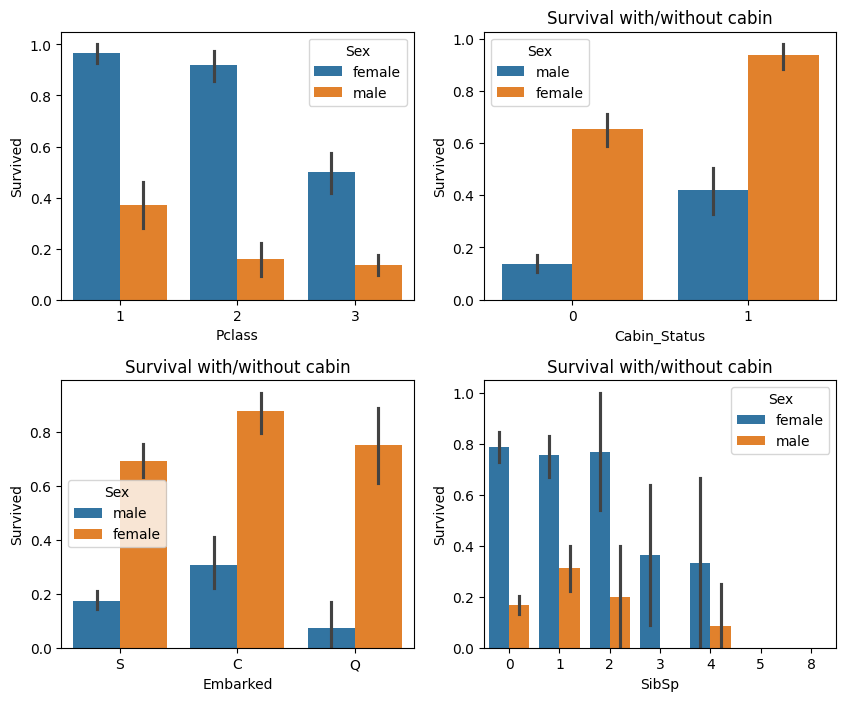

In [47]:
_,axes = plt.subplots(2,2)

sns.barplot(ax=axes[0,0], x='Pclass', y='Survived', data=titanic_dataset, hue='Sex')
sns.barplot(ax=axes[0,1], x='Cabin_Status', y='Survived', data=titanic_dataset, hue='Sex').set_title("Survival with/without cabin")
sns.barplot(ax=axes[1,0], x='Embarked', y='Survived', data=titanic_dataset, hue='Sex').set_title("Survival with/without cabin")
sns.barplot(ax=axes[1,1], x='SibSp', y='Survived', data=titanic_dataset, hue='Sex').set_title("Survival with/without cabin")

plt.subplots_adjust(hspace=0.3)
plt.show()

Insight
- Sex: Survival of Female sex in each category is significantly higher.
- Pclass: Survival chances decreases with lower class. 1st class population has 62% chances and 3rd class with the least chances of survival at 25%.
- Embarked: Majority on population onboraded from S followed by C and Q. However, the survival rate for S is the lowest with 33% and C with the higest survival rate at 55%.
- Cabin: So population with cabin has the higher chances of survival in comparison to without.

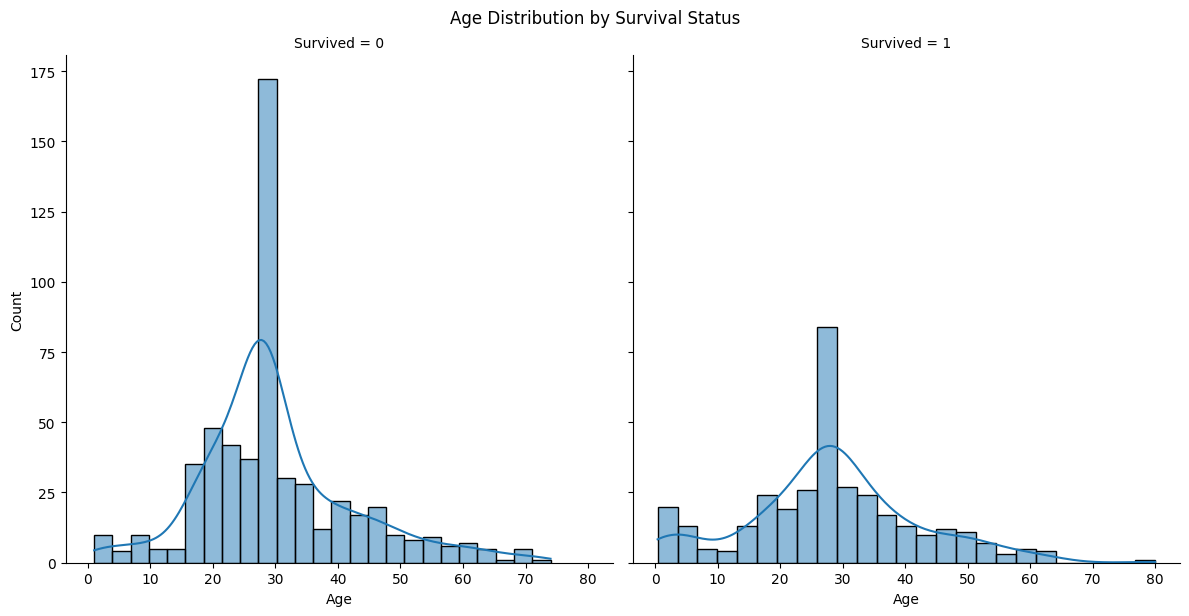

In [48]:
g = sns.FacetGrid(titanic_dataset, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

Insight:
- The graph shows the same pattern for population able to survive and not. Where majority of pupulation belongs to late 20's.
- However, we can observe that newborn and elderly(72+ age) where able to survive. 

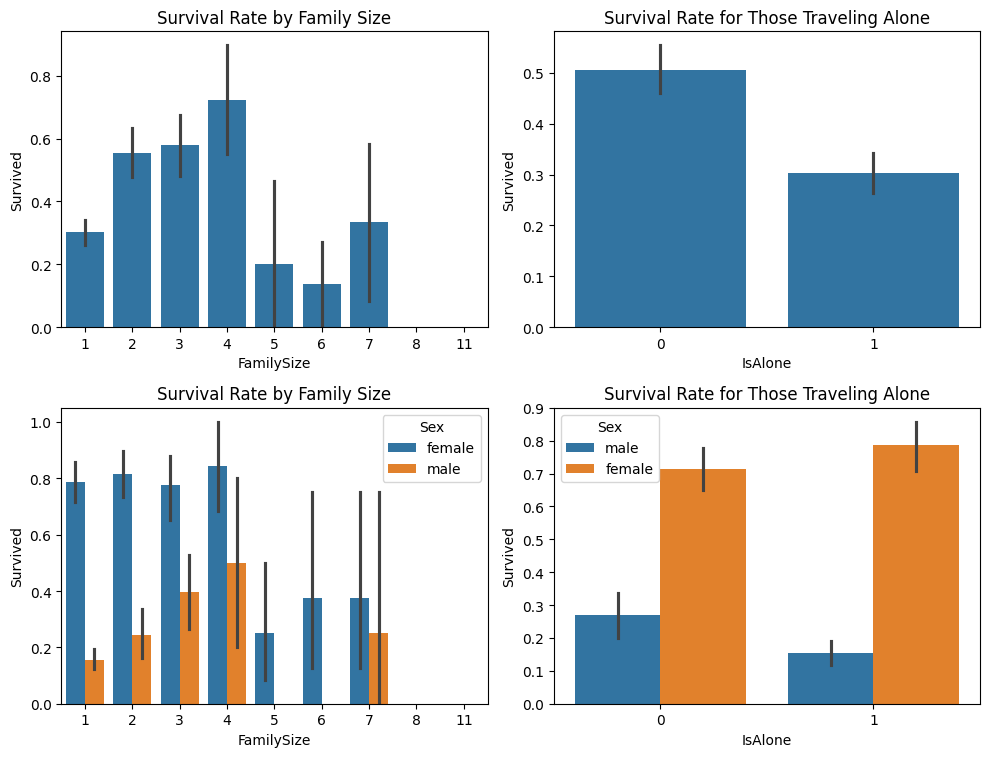

In [60]:
titanic_dataset['FamilySize'] = titanic_dataset['SibSp'] + titanic_dataset['Parch'] + 1 # +1 for the person themselves

titanic_dataset['IsAlone'] = 0
titanic_dataset.loc[titanic_dataset['FamilySize'] == 1, 'IsAlone'] = 1

_, axes = plt.subplots(2,2)

sns.barplot(ax=axes[0,0], x='FamilySize', y='Survived', data=titanic_dataset).set_title('Survival Rate by Family Size')
sns.barplot(ax=axes[0,1], x='IsAlone', y='Survived', data=titanic_dataset).set_title('Survival Rate for Those Traveling Alone')
sns.barplot(ax=axes[1,0], x='FamilySize', y='Survived', data=titanic_dataset, hue='Sex').set_title('Survival Rate by Family Size')
sns.barplot(ax=axes[1,1], x='IsAlone', y='Survived', data=titanic_dataset, hue='Sex').set_title('Survival Rate for Those Traveling Alone')

plt.subplots_adjust(hspace=0.3)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Insight
- Families with 4 members have the highest survival chances 70%, followed by 3 and 2 closely with 58%. Population with 8+ members have the no chance of survival.
- Surprisingly, solo people has the lower chances of survival, coming at 5th place in the array 4,3,2,7,1,5,6.

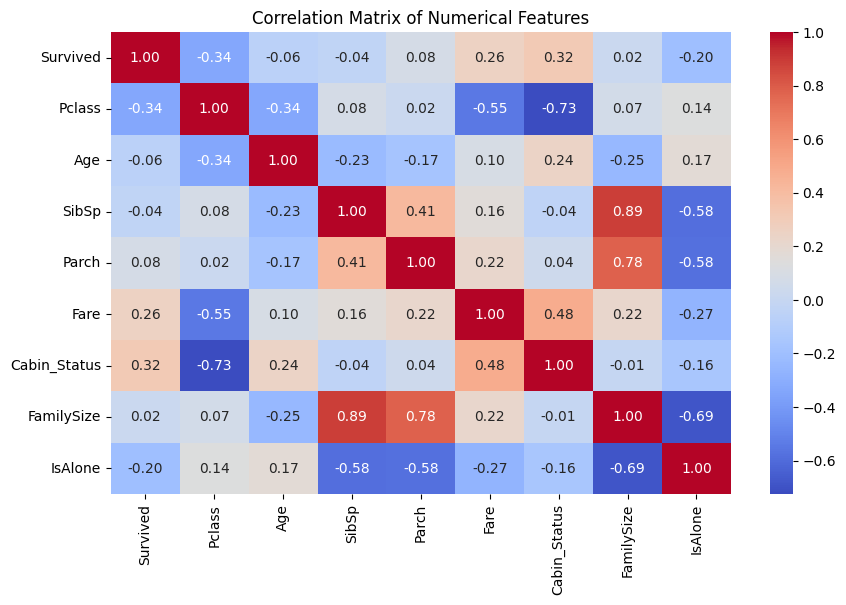

In [63]:
plt.figure(figsize=(10, 6))
numeric_cols = titanic_dataset.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [64]:
df = pd.DataFrame(titanic_dataset)
display(df)

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Embarked  \
0      male  22.0      1      0         A/5 21171   7.2500        S   
1    female  38.0      1      0          PC 17599  71.2833        C   
2    female  26.0      0      0  STON/O2. 3101282   7.9250        S   
3    female  35.0      1      0            113803  53.1000        S   
4      male  35.0      0      0            373450   8.0500        S   
..      ...   ...    ...    ...               ...      ...      ...   
886    male  27.0      0      0            211536  13.0000        S   
887  female  19.0      0      0            112053  30.0000        S   
888  female  28.0      1      2        W./C. 6607  23.4500        S   
889    male  26.0      0      0            111369  30.0000        C   
890    male  32.0      0      0            370376   7.7500        Q   

     Cabin_Status  FamilySize  IsAlone  
0               0           2        0  
1               1           2        0  
2               0           1        1  
3               1           2        0  
4               0           1        1  
..            ...         ...      ...  
886             0           1        1  
887             1           1        1  
888             0           4        0  
889             1           1        1  
890             0           1        1  

[891 rows x 13 columns]

In [66]:
!pip install ydata-profiling -q

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\21_Days_Code_Marathon\\.venv\\Lib\\site-packages\\~cipy.libs\\libscipy_openblas-6b2103f2ae4d8547998b5d188e9801fb.dll'
Check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
# Generate the profiling report
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()
profile.to_file("sample.html")

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 83.28it/s]
